# 1.1

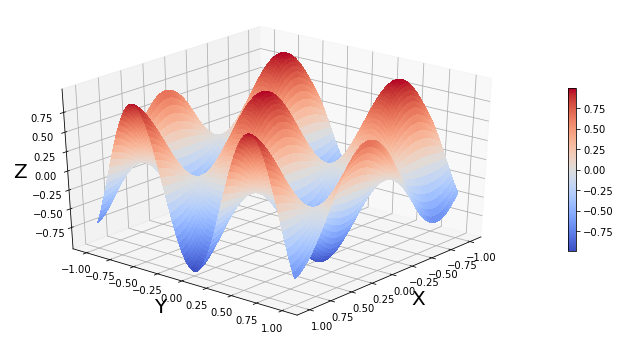

In [1]:
# Referenced from Week 1 material provided Dr. Frank Guerin

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def f(x1,x2):
    return (np.sin(3.5*x1 + 1.0))*(np.cos(5.5*x2))


xrange = np.linspace(-1, 1, 100)
yrange = np.linspace(-1, 1, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('X', fontsize =20)
ax.set_ylabel('Y',fontsize =20)
ax.set_zlabel('Z',fontsize =20)
p=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30, 40)
cb = fig.colorbar(p, shrink=0.5)

# 1.2

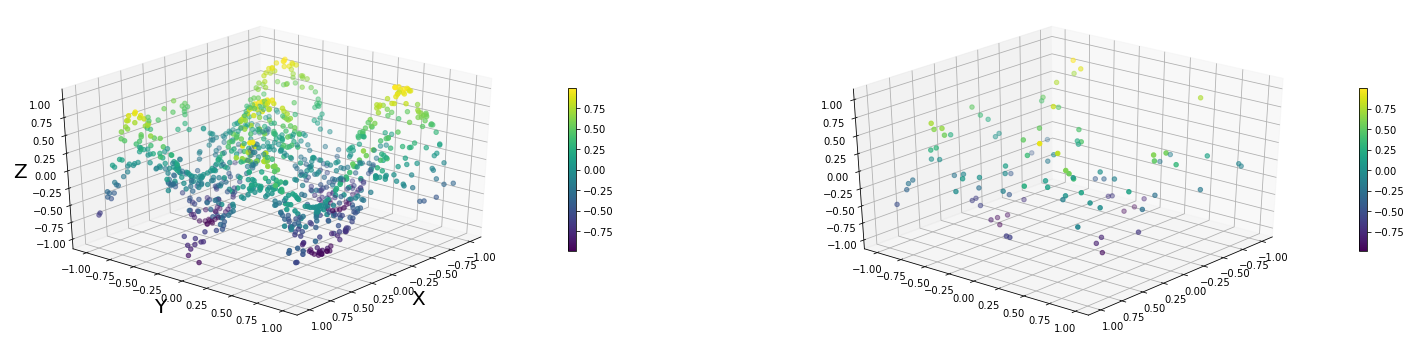

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch, torchvision
from numpy import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# random.seed(1)
random_array_x1 = random.uniform(-1,1,1100)
random_array_x2 = random.uniform(-1,1,1100)
x1_train = random_array_x1[:1000]
x1_test = random_array_x1[1000:]
x2_train = random_array_x2[:1000]
x2_test = random_array_x2[1000:]

x_train = np.vstack((x1_train, x2_train)).T
x_test = np.vstack((x1_test, x2_test)).T

x_train_tensor = torch.as_tensor(x_train,dtype = torch.float32)
x_test_tensor = torch.as_tensor(x_test, dtype = torch.float32)

def f(x1,x2):
    return (np.sin(3.5*x1 + 1.0))*(np.cos(5.5*x2))

y = f(random_array_x1,random_array_x2)
y_train = y[:1000]
y_test = y[1000:]

y_train_tensor = torch.as_tensor(y_train, dtype = torch.float32).reshape(1000,1)
y_test_tensor = torch.as_tensor(y_test, dtype = torch.float32).reshape(100,1)

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('X', fontsize =20)
ax.set_ylabel('Y',fontsize =20)
ax.set_zlabel('Z',fontsize =20)
p=ax.scatter3D(x1_train, x2_train, y_train,c = y_train, zorder=0)
ax.view_init(30, 40)
cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p=ax.scatter3D(x1_test, x2_test, y_test,c = y_test, zorder=0)
ax.view_init(30, 40)
cb = fig.colorbar(p, shrink=0.5)


# 1.3

In [2]:
import torch
import numpy as np

# initialise weights to 0.5
def weights_init(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.constant_(m.weight, 0.5)
        torch.nn.init.constant_(m.bias, 0.5)

# set up the network
class Net(torch.nn.Module):
    # initialise two hidden layer and one output layer
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)# hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)  # output layer

    # connect up the layers: the input passes through the hidden, then the sigmoid, then the output layer
    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))  # activation function for hidden layer
        x = torch.sigmoid(self.hidden2(x))
        x = self.out(x)
        return x


net = Net(n_feature=2, n_hidden=6, n_output=1)  # define the network
print(net)  # net architecture
# net.apply(weights_init)  # apply weight initialisation
# print(list(net.parameters()))

Net(
  (hidden1): Linear(in_features=2, out_features=6, bias=True)
  (hidden2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=1, bias=True)
)


In [4]:
z=torch.nn.Parameter(torch.from_numpy((np.asarray(x[54:60],dtype=np.float64))))
print(list(net.parameters()))

NameError: name 'x' is not defined

# 1.4

In [3]:
def weightsOutofNetwork(net):
    temp = []
    for layer, param in net.state_dict().items():
        temp.extend(param.reshape(1,param.numel()).tolist()[0])
    return temp
    
    
    
#     for i in list(range(0,len(list(net.parameters()))-2,2)):
#         temp.append(list(net.parameters())[i].tolist())
#     return temp
x= weightsOutofNetwork(net)
# x[0]=[[0.4, 0.5], [0.3, 0.5], [0.3, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
print(x)
# for i in list(range(0,len(list(net.parameters()))-2,2)):
   

[-0.6556827425956726, 0.2614763379096985, -0.5538400411605835, 0.3294857144355774, 0.1692853569984436, -0.6359997391700745, -0.4524770975112915, -0.5299606323242188, -0.5362562537193298, -0.5344117283821106, 0.2714500427246094, 0.3358275294303894, -0.6139916777610779, 0.04792529344558716, -0.2587001323699951, -0.6584212779998779, 0.6585775017738342, 0.259651780128479, -0.2562471628189087, -0.35688379406929016, 0.30819255113601685, -0.21116845309734344, -0.2275967299938202, -0.3453288972377777, 0.10224705934524536, -0.14648568630218506, -0.16930174827575684, 0.14295518398284912, 0.10603582859039307, -0.0766635537147522, 0.12475460767745972, 0.07940429449081421, -0.30864283442497253, -0.07195818424224854, 0.03896385431289673, 0.31515777111053467, -0.31204208731651306, 0.12627577781677246, -0.052015095949172974, 0.14357095956802368, 0.26985853910446167, 0.0798184871673584, -0.08811470866203308, 0.050323665142059326, 0.10037773847579956, -0.3025648593902588, -0.23935584723949432, 0.0204943

In [4]:
x[0:net.hidden1.weight.numel()]=[0.5, -0.5, 0.5, -0.2009935975074768, -0.4440346658229828, -0.5795811414718628, -0.3563995659351349, -0.2712641954421997, -0.37799981236457825, -0.4614013433456421, 0.516570508480072, -0.48260414600372314,]
print(len(x))

print(net.hidden1.weight.numel())
# z = torch.nn.Parameter(torch.from_numpy((np.asarray(x[66:67],dtype=np.float64))))
# z.shape

67
12


In [5]:
print(torch.nn.Parameter(torch.from_numpy((np.asarray(x[0:12])).reshape(6,2))))
#     del(x[0:net.hidden1.weight.numel()])
print(torch.nn.Parameter(torch.from_numpy((np.asarray(x[12:18]).reshape(1,6)))))
#     del(x[0:net.hidden1.bias.numel()])
    
print(torch.nn.Parameter(torch.from_numpy((np.asarray(x[18:54]).reshape(6,6)))))
#     del(x[0:net.hidden2.weight.numel()])
print(torch.nn.Parameter(torch.from_numpy((np.asarray(x[54:60]).reshape(1,6)))))
#     del(x[0:net.hidden2.bias.numel()])

Parameter containing:
tensor([[ 0.5000,  0.5000],
        [ 0.5000, -0.2591],
        [ 0.2920,  0.3288],
        [ 0.3151, -0.6949],
        [ 0.5238, -0.5888],
        [ 0.6260, -0.4585]], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([[-0.0024,  0.3605, -0.1275,  0.2117, -0.0534,  0.6377]],
       dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([[-0.0719,  0.3152,  0.2638, -0.1477, -0.3309, -0.1549],
        [-0.2956, -0.3966, -0.3648, -0.2818, -0.0737,  0.1444],
        [ 0.1334,  0.2792,  0.2046, -0.0710,  0.2987,  0.1908],
        [-0.0340,  0.1341,  0.2148, -0.1946,  0.1649,  0.4030],
        [ 0.2471, -0.1682, -0.1899, -0.0759,  0.0234,  0.2463],
        [ 0.2000, -0.1711,  0.1268,  0.0931,  0.0506,  0.1737]],
       dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([[ 0.3221, -0.2520, -0.2936, -0.0100, -0.3296,  0.1067]],
       dtype=torch.float64, requires_grad=True)


In [5]:
def weightsIntoNetwork(x):
    net.hidden1.weight = torch.nn.Parameter(torch.from_numpy((np.asarray(x[0:12], dtype=np.float64)).reshape(6,2)))
    net.hidden1.bias = torch.nn.Parameter(torch.from_numpy(np.asarray(x[12:18],dtype=np.float64)))
    net.hidden2.weight = torch.nn.Parameter(torch.from_numpy((np.asarray(x[18:54],dtype=np.float64)).reshape(6,6)))
    net.hidden2.bias = torch.nn.Parameter(torch.from_numpy(np.asarray(x[54:60],dtype=np.float64)))
    net.out.weight = torch.nn.Parameter(torch.from_numpy((np.asarray(x[60:66],dtype=np.float64)).reshape(1,6)))
    net.out.bias = torch.nn.Parameter(torch.from_numpy(np.asarray(x[66:67],dtype=np.float64)))
    return None


weightsIntoNetwork(x)

# m = [a for a in dir(net) if a.startswith('hi')]
# print(m)
# for i in range(0,len(x)-2):
#     weights = np.asarray(x[i])
#     weights = torch.nn.Parameter(torch.from_numpy(weights))
#     if (i%2)==0:
#         net.m[i].weight = weights
#     else:
#         net.m[i].bias = weights


In [28]:
print(y_train_tensor.size())
y_train_tensor = y_train_tensor.reshape(1000,1)


torch.Size([1000, 1])


In [14]:
x= weightsOutofNetwork(net)
# x[0]=[[0.4, 0.5], [0.3, 0.5], [0.3, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
print(x)

[0.5, -0.5, 0.5, -0.2009935975074768, -0.4440346658229828, -0.5795811414718628, -0.3563995659351349, -0.2712641954421997, -0.37799981236457825, -0.4614013433456421, 0.516570508480072, -0.48260414600372314, -14.161111377179623, 16.86419904232025, 16.391233392059803, -15.003343783318996, -18.5288292914629, -2.2118157520890236, -13.23354322463274, 15.099550373852253, 10.394476242363453, 12.195918895304203, -18.395016826689243, 16.820291243493557, 5.663867741823196, 8.031140454113483, 8.97293396294117, 14.741944596171379, -2.9684126377105713, 0.10987497866153717, 5.317026861011982, 14.098048210144043, 10.168568454682827, -10.879971832036972, -11.204005926847458, 13.470330573618412, -9.661134779453278, -17.73195307701826, 8.053825087845325, -13.212098553776741, -7.974591441452503, -17.764049842953682, -11.165688335895538, -7.723110057413578, -16.410942412912846, -0.4177684336900711, 10.390211306512356, -10.717234537005424, -6.468244194984436, -8.392239734530449, 13.62077608704567, -5.152891

In [55]:
for i in range(0,2010,30):
    
    print(i,i+30)

0 30
30 60
60 90
90 120
120 150
150 180
180 210
210 240
240 270
270 300
300 330
330 360
360 390
390 420
420 450
450 480
480 510
510 540
540 570
570 600
600 630
630 660
660 690
690 720
720 750
750 780
780 810
810 840
840 870
870 900
900 930
930 960
960 990
990 1020
1020 1050
1050 1080
1080 1110
1110 1140
1140 1170
1170 1200
1200 1230
1230 1260
1260 1290
1290 1320
1320 1350
1350 1380
1380 1410
1410 1440
1440 1470
1470 1500
1500 1530
1530 1560
1560 1590
1590 1620
1620 1650
1650 1680
1680 1710
1710 1740
1740 1770
1770 1800
1800 1830
1830 1860
1860 1890
1890 1920
1920 1950
1950 1980
1980 2010


In [92]:

print(x_train_tensor)
# print(y_train_tensor)

tensor([[-0.1660, -0.6149],
        [ 0.4406,  0.5059],
        [-0.9998, -0.9854],
        ...,
        [ 0.3376,  0.3296],
        [-0.3481, -0.4425],
        [ 0.5490, -0.3707]], dtype=torch.float64)


In [15]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
x_train_tensor = torch.as_tensor(x_train,dtype = torch.double)
x_test_tensor = torch.as_tensor(x_test, dtype = torch.double)

popSize     = 30 #Population size
dimension   = 67 #Number of decision variable x 
numOfBits   = 30 #Number of bits in the chromosomes
iterations  = 100 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized

loss_func = torch.nn.MSELoss() #MSE = mean squared error
def eval_sphere(individual):
    weights=separatevariables(individual)
#     print(weights)
    weightsIntoNetwork(weights)
    y_1 = net(x_train_tensor)
#     d=weightsOutofNetwork()
#     print(d)
#     print(y_1)
#     print("\nThe output of the network is y1:", y_1)

    # use pytorch's built in MSELoss
    criterion = torch.nn.MSELoss()
   
   

    # Compute and print loss
    loss = criterion(y_1, y_train_tensor)
    torch.save(net.state_dict(), 'my_net_params.pkl')
#     print("\nMSE:", loss.item())
    loss = loss.tolist()
    return 1.0/(0.01+loss), # DEAP doesn't allow minimisation for roulette selection
                         # so we convert to maximisation
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_sphere)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: This uses fitness proportionate selection,
# also known as roulette wheel selection
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

#----------

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    weights = []
    for m in range(0,2010,30):
        weights.append(chrom2real(v[m:m+30]))
#     print(weights)
    return weights
loss_values = []
def main():
#     random.seed(64)
    # create an initial population of individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=popSize)
    print(len(pop))
#     print('pop',pop)
#     i = 0
#     for individ in pop:
#         print('ind',individ)
#         sep=separatevariables(individ)
#         print(sep)
#         i+=1
#     print(i)
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    print(fitnesses)
#     print(pop)
    for ind, fit in zip(pop, fitnesses):
#             print(ind, fit)
            ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
#     print(fits)

    # Variable keeping track of the number of generations
    g = 0

    # Begin the evolution
    while g < iterations:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
#         for individ in pop:
#             print(individ)
        
        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
#         print(len(offspring))
#         print(offspring)
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
#         for individ in offspring:
#             print(individ)

    
        # Apply crossover and mutation on the offspring
        # make pairs of offspring for crossing over
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < crossProb:
#                 print('before crossover ',child1, child2)
                toolbox.mate(child1, child2)
                #print('after crossover ',child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability mutateprob
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        #print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        best_ind = tools.selBest(pop, 1)[0]
#         print(best_ind.fitness.values[0])
        loss_values.append(1/best_ind.fitness.values[0])
        if g%dspInterval ==0:
            # Gather all the fitnesses in one list and print the stats
            fits = [ind.fitness.values[0] for ind in pop]
            print(fits)
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best fitness is %s" % (best_ind.fitness.values))
    print(separatevariables(best_ind))
    return loss_values
    

if __name__ == "__main__":
    main()
#     print(loss_values)
    plt.plot(np.array(loss_values), 'r')
#     plt.title('Training Error Plot')

30
[(0.016771945917995645,), (0.004543438682902272,), (0.009127709403191887,), (0.0037337333628391575,), (0.001145442765526231,), (0.014149699474208022,), (0.0015288231682021047,), (0.0036526568821903904,), (0.05374437332598112,), (0.00755070434195283,), (0.004297362259331488,), (0.006605488936885848,), (0.0021040049507197386,), (0.0051956128207925455,), (0.0022546026909412466,), (0.0020659726333444534,), (0.025598001144844493,), (0.007320615624392107,), (0.015089974419404665,), (0.0029628917139932934,), (0.030907849754025007,), (0.006386959972306186,), (0.003369897331902995,), (0.0025782582200091914,), (0.020325162160363643,), (0.006246926016905555,), (0.0005022072329985098,), (0.007718416320072941,), (0.0034252466556509245,), (0.045631854850700634,)]
  Evaluated 30 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
[0.5203858411758409

KeyboardInterrupt: 

# 1.6

In [11]:
net2 = Net(n_feature=2, n_hidden=6, n_output=1)
net2.load_state_dict(torch.load('my_net_params.pkl'))
xs = torch.linspace(-1, 1, steps=100)
ys = torch.linspace(-1, 1, steps=100)
x,y = torch.meshgrid(xs, ys, indexing='xy')
inp = torch.stack([x, y], dim=2)
z = net2(inp)


import numpy
newz=[]
count =0
for m in range(100):
    temp=[]
    for i in range(count,count+100):
        temp.append(z.detach().numpy().flat[i])
    newz.append(temp)
    count = count + 100
newz= numpy.asarray(newz) 
newz

# Referenced from Week 1 material provided Dr. Frank Guerin

import numpy as np
import matplotlib
import matplotlib.pyplot as plt




fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.set_xlabel('X', fontsize =20)
# ax.set_ylabel('Y',fontsize =20)
# ax.set_zlabel('Z',fontsize =20)
p=ax.plot_surface(x.numpy(),y.numpy(),newz, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30, 40)
cb = fig.colorbar(p, shrink=0.5)

In [38]:
x.numpy()

array([[-1.        , -0.97979796, -0.959596  , ...,  0.959596  ,
         0.97979796,  1.        ],
       [-1.        , -0.97979796, -0.959596  , ...,  0.959596  ,
         0.97979796,  1.        ],
       [-1.        , -0.97979796, -0.959596  , ...,  0.959596  ,
         0.97979796,  1.        ],
       ...,
       [-1.        , -0.97979796, -0.959596  , ...,  0.959596  ,
         0.97979796,  1.        ],
       [-1.        , -0.97979796, -0.959596  , ...,  0.959596  ,
         0.97979796,  1.        ],
       [-1.        , -0.97979796, -0.959596  , ...,  0.959596  ,
         0.97979796,  1.        ]], dtype=float32)

In [12]:
import numpy
newz=[]
count =0
for m in range(100):
    temp=[]
    for i in range(count,count+100):
        temp.append(z.detach().numpy().flat[i])
    newz.append(temp)
    count = count + 100
newz= numpy.asarray(newz) 
newz

array([[-0.6913991 , -0.6913991 , -0.6913991 , ..., -0.11745691,
        -0.09538126, -0.08148909],
       [-0.6913991 , -0.6913991 , -0.6913991 , ..., -0.17290592,
        -0.15233707, -0.13880062],
       [-0.6913991 , -0.6913991 , -0.6913991 , ..., -0.22373438,
        -0.20429754, -0.19087315],
       ...,
       [ 0.7813344 ,  0.7978525 ,  0.8122082 , ...,  0.69411516,
         0.6534958 ,  0.5963831 ],
       [ 0.6729822 ,  0.7101202 ,  0.74191236, ...,  0.7049551 ,
         0.6684375 ,  0.6163292 ],
       [ 0.44004583,  0.51539755,  0.5818596 , ...,  0.7141957 ,
         0.68134165,  0.63382053]], dtype=float32)

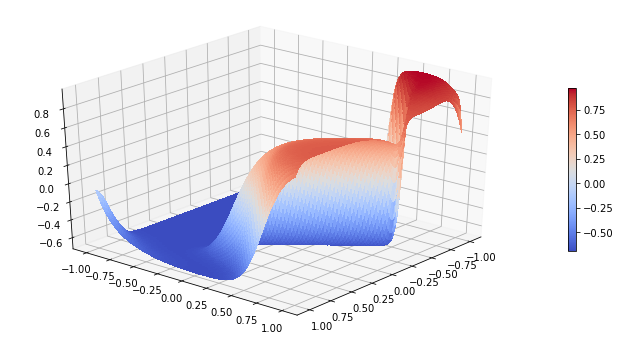

In [14]:
# Referenced from Week 1 material provided Dr. Frank Guerin

import numpy as np
import matplotlib
import matplotlib.pyplot as plt




fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.set_xlabel('X', fontsize =20)
# ax.set_ylabel('Y',fontsize =20)
# ax.set_zlabel('Z',fontsize =20)
p=ax.plot_surface(x.numpy(),y.numpy(),newz, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30, 40)
cb = fig.colorbar(p, shrink=0.5)

# 1.7

In [15]:
x = weightsOutofNetwork(net)
x

[0.5,
 -0.5,
 0.5,
 -0.2009935975074768,
 -0.4440346658229828,
 -0.5795811414718628,
 -0.3563995659351349,
 -0.2712641954421997,
 -0.37799981236457825,
 -0.4614013433456421,
 0.516570508480072,
 -0.48260414600372314,
 -14.161111377179623,
 16.86419904232025,
 16.391233392059803,
 -15.003343783318996,
 -18.5288292914629,
 -2.2118157520890236,
 -13.23354322463274,
 15.099550373852253,
 10.394476242363453,
 12.195918895304203,
 -18.395016826689243,
 16.820291243493557,
 5.663867741823196,
 8.031140454113483,
 8.97293396294117,
 14.741944596171379,
 -2.9684126377105713,
 0.10987497866153717,
 5.317026861011982,
 14.098048210144043,
 10.168568454682827,
 -10.879971832036972,
 -11.204005926847458,
 13.470330573618412,
 -9.661134779453278,
 -17.73195307701826,
 8.053825087845325,
 -13.212098553776741,
 -7.974591441452503,
 -17.764049842953682,
 -11.165688335895538,
 -7.723110057413578,
 -16.410942412912846,
 -0.4177684336900711,
 10.390211306512356,
 -10.717234537005424,
 -6.468244194984436,


In [56]:
data = [ -0.2009935975074768,
 -0.4440346658229828,
 -0.5795811414718628,
 -0.3563995659351349,
 -0.2712641954421997,
 -0.37799981236457825,
 -0.4614013433456421,
 0.516570508480072,
 -0.48260414600372314,
 -14.161111377179623,
 16.86419904232025,
 16.391233392059803,
 -15.003343783318996,
 -18.5288292914629,
 -2.2118157520890236,
 -13.23354322463274,
 15.099550373852253,
 10.394476242363453,
 12.195918895304203,
 -18.395016826689243,
 16.820291243493557,
 5.663867741823196,
 8.031140454113483,
 8.97293396294117]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-20, 20))

scaled = scaler.fit_transform([[x] for x in data])
print(scaled)
# # manual scaling
# scaled = [-20 + 20 * (x - min(data)) / (max(data) - min(data)) for x in data]
# # print(scaled)
# scaled = [0 + 20 * (x - min(data)) / (max(data) - min(data)) for x in data]
# print(scaled)
type(data)

[[  0.71349817]
 [  0.4388214 ]
 [  0.28563137]
 [  0.53786362]
 [  0.63408073]
 [  0.51345175]
 [  0.41919417]
 [  1.52446478]
 [  0.39523148]
 [-15.06375338]
 [ 20.        ]
 [ 19.46547027]
 [-16.01561587]
 [-20.        ]
 [ -1.55906481]
 [-14.01544732]
 [ 18.00565394]
 [ 12.68813876]
 [ 14.72406814]
 [-19.84876969]
 [ 19.9503769 ]
 [  7.34176551]
 [ 10.01717682]
 [ 11.0815599 ]]


list

# 1.7

In [6]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin, bin_to_gray
def weights_to_gray(x):
    weights =[]
    gray_final=[]
    for num in x:
        weight = int(num)
        if weight>20:
            weight = 20
        if weight<-20:
            weight = -20
        #shifting the range to 0-40
        weight = weight+20
        binary_w = format(weight, '#032b')[2:]
        gray_w = bin_to_gray(binary_w)
        weights.append(gray_w)
#     print(weights)
    for x in weights:
        for num in x:
            gray_final.append(int(num))
    return gray_final

In [18]:
data = [ 1.52446478, 0.39523148,-15.06375338, 20. , 19.46547027,-16.01561587, -22, 29]
x = weights_to_gray(data)
print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]


In [7]:
def gray_to_weights(x):
    def chrom2real(c):
        indasstring=''.join(map(str, c))
        degray=gray_to_bin(indasstring)
        numasint=int(degray, 2) # convert to int from base 2 list
        return numasint
    i = 0
    weights =[]
    for _ in range(int(len(x)/30)):
        val = chrom2real(x[i:i+30])
        val = val-20
        weights.append(val)
        i =i+30
    return weights

In [19]:
x = gray_to_weights(x)
print(x)

[1, 0, -15, 20, 19, -16, -20, 20]


# 1.8

C:\Users\mehul\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\mehul\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\mehul\anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


20
[(0.005308868359828078,), (0.0007860980806121673,), (0.002749991712332606,), (0.0026459966571948795,), (0.0038747217690315123,), (0.0003153538498764048,), (0.00553794811127516,), (0.002335340963755051,), (0.003523037078518588,), (0.0040409593142213185,), (0.004766108080725325,), (0.001078047661550736,), (0.004497025072544197,), (0.0018245900973431132,), (0.013660175912880624,), (0.03645715530967164,), (0.0009972586620086237,), (0.0020915283186731574,), (0.004802013017322577,), (0.0013542995539759827,)]
  Evaluated 20 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
[0.07767505926212726, 0.07768804855583962, 0.07768804479681442, 0.07763035056988625, 0.0776750630864505, 0.077675091151698, 0.07763035056988625, 0.07763035056988625, 0.07763035056988625, 0.0776750630864505, 0.0776750630864505, 0.01142210520621317, 0.07763035056988625, 0.

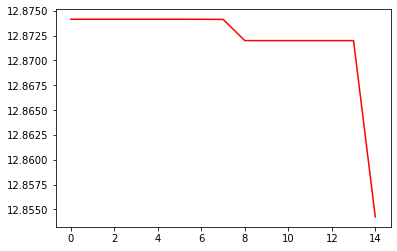

In [44]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
x_train_tensor = torch.as_tensor(x_train,dtype = torch.double)
x_test_tensor = torch.as_tensor(x_test, dtype = torch.double)

popSize     = 20 #Population size
dimension   = 67 #Number of decision variable x 
numOfBits   = 30 #Number of bits in the chromosomes
iterations  = 15 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized

loss_func = torch.nn.MSELoss() #MSE = mean squared error
def eval_sphere(individual):
    weights=separatevariables(individual)
#     print(weights)
    weightsIntoNetwork(weights)
    y_1 = net(x_train_tensor)
#     d=weightsOutofNetwork()
#     print(d)
#     print(y_1)
#     print("\nThe output of the network is y1:", y_1)

    # use pytorch's built in MSELoss
    criterion = torch.nn.MSELoss()
   
   

    # Compute and print loss
    loss = criterion(y_1, y_train_tensor)
    torch.save(net.state_dict(), 'my_net_params.pkl')
#     print("\nMSE:", loss.item())
    loss = loss.tolist()
    return 1.0/(0.01+loss), # DEAP doesn't allow minimisation for roulette selection
                         # so we convert to maximisation
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_sphere)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: This uses fitness proportionate selection,
# also known as roulette wheel selection
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

#----------

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    weights = []
    for m in range(0,2010,30):
        weights.append(chrom2real(v[m:m+30]))
#     print(weights)
    return weights
loss_values = []
def main():
#     random.seed(64)
    # create an initial population of individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=popSize)
    print(len(pop))
#     print('pop',pop)
#     i = 0
#     for individ in pop:
#         print('ind',individ)
#         sep=separatevariables(individ)
#         print(sep)
#         i+=1
#     print(i)
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    print(fitnesses)
#     print(pop)
    for ind, fit in zip(pop, fitnesses):
#             print(ind, fit)
            ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
#     print(fits)

    # Variable keeping track of the number of generations
    g = 0

    # Begin the evolution
    while g < iterations:
        # A new generation
        for ind in pop:
            w = gray_to_weights(ind)
            weightsIntoNetwork(w)
            optimizer = torch.optim.Rprop(net.parameters(), lr=0.02) #lr = learning rate
            loss_func = torch.nn.MSELoss() #MSE = mean squared error

            #do 600 steps of gradient descent
            for t in range(30):
                out = net(x_train_tensor)  # input x and predict network output based on x
                y_train_tensor = torch.as_tensor(y_train,dtype = torch.double)
                loss = loss_func(out, y_train_tensor) # compare output with grount truth label y
                optimizer.zero_grad()  # clear gradients for next train
                loss.backward()  # backpropagation, compute gradients
                optimizer.step()  # 
            we =weightsOutofNetwork(net)
            wei = weights_to_gray(we)
            y_train_tensor = torch.as_tensor(y_train,dtype = torch.float32)
            #replacing the indvidual with the updated one
            ind = wei
        g = g + 1
        print("-- Generation %i --" % g)
#         for individ in pop:
#             print(individ)
        
        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
#         print(len(offspring))
#         print(offspring)
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
#         for individ in offspring:
#             print(individ)

    
        # Apply crossover and mutation on the offspring
        # make pairs of offspring for crossing over
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < crossProb:
#                 print('before crossover ',child1, child2)
                toolbox.mate(child1, child2)
                #print('after crossover ',child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability mutateprob
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        #print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        best_ind = tools.selBest(pop, 1)[0]
#         print(best_ind.fitness.values[0])
        loss_values.append(1/best_ind.fitness.values[0])
        if g%dspInterval ==0:
            # Gather all the fitnesses in one list and print the stats
            fits = [ind.fitness.values[0] for ind in pop]
            print(fits)
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best fitness is %s" % (best_ind.fitness.values))
    print(separatevariables(best_ind))
    return loss_values
    

if __name__ == "__main__":
    main()
#     print(loss_values)
    plt.plot(np.array(loss_values), 'r')
#     plt.title('Training Error Plot')

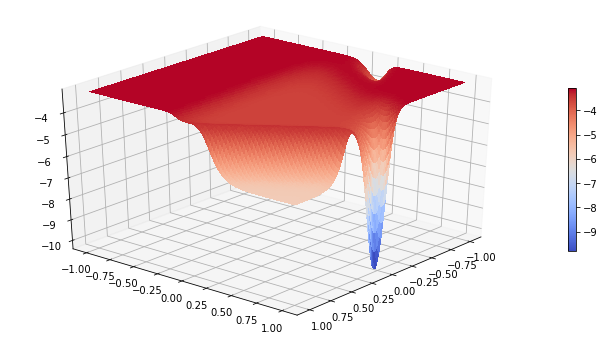

In [45]:
net2 = Net(n_feature=2, n_hidden=6, n_output=1)
net2.load_state_dict(torch.load('my_net_params.pkl'))
xs = torch.linspace(-1, 1, steps=100)
ys = torch.linspace(-1, 1, steps=100)
x,y = torch.meshgrid(xs, ys, indexing='xy')
inp = torch.stack([x, y], dim=2)
z = net2(inp)


import numpy
newz=[]
count =0
for m in range(100):
    temp=[]
    for i in range(count,count+100):
        temp.append(z.detach().numpy().flat[i])
    newz.append(temp)
    count = count + 100
newz= numpy.asarray(newz) 
newz

# Referenced from Week 1 material provided Dr. Frank Guerin

import numpy as np
import matplotlib
import matplotlib.pyplot as plt




fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.set_xlabel('X', fontsize =20)
# ax.set_ylabel('Y',fontsize =20)
# ax.set_zlabel('Z',fontsize =20)
p=ax.plot_surface(x.numpy(),y.numpy(),newz, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30, 40)
cb = fig.colorbar(p, shrink=0.5)

C:\Users\mehul\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\mehul\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\mehul\anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


20
[(0.0007056648949805129,), (0.0008073712138974202,), (0.0030168238210600993,), (0.0007366969172503164,), (0.008756012442094863,), (0.008358011863359526,), (0.0012935062248721374,), (0.013277696163500063,), (0.014439508821023989,), (0.017649564818087583,), (0.004750003953371083,), (0.007424041552930057,), (0.0018735475730538114,), (0.0005687557692250241,), (0.02954154198610714,), (0.010323721255496928,), (0.013787967589122891,), (0.0006691175512356306,), (0.012840112293734711,), (0.016906620269917905,)]
  Evaluated 20 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
[0.027858336166780386, 0.001061172817077381, 0.0016545939513272613, 0.0017814385135351944, 0.017929416972928505, 0.00794063077114821, 0.0011980020637568237, 0.0076362726565217505, 0.025123714306615225, 0.0032642920077521247, 0.003318159044804085, 0.005605226031891254, 0.

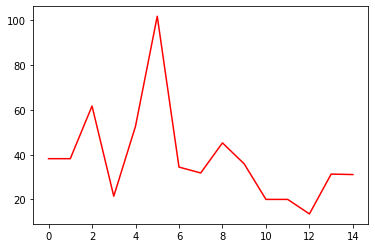

In [43]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
x_train_tensor = torch.as_tensor(x_train,dtype = torch.double)
x_test_tensor = torch.as_tensor(x_test, dtype = torch.double)

popSize     = 20 #Population size
dimension   = 67 #Number of decision variable x 
numOfBits   = 30 #Number of bits in the chromosomes
iterations  = 15 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized

loss_func = torch.nn.MSELoss() #MSE = mean squared error
def eval_sphere(individual):
    weights=separatevariables(individual)
#     print(weights)
    weightsIntoNetwork(weights)
    y_1 = net(x_test_tensor)
#     d=weightsOutofNetwork()
#     print(d)
#     print(y_1)
#     print("\nThe output of the network is y1:", y_1)

    # use pytorch's built in MSELoss
    criterion = torch.nn.MSELoss()
   
   

    # Compute and print loss
    loss = criterion(y_1, y_test_tensor)
    torch.save(net.state_dict(), 'my_net_params.pkl')
#     print("\nMSE:", loss.item())
    loss = loss.tolist()
    return 1.0/(0.01+loss), # DEAP doesn't allow minimisation for roulette selection
                         # so we convert to maximisation
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_sphere)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: This uses fitness proportionate selection,
# also known as roulette wheel selection
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

#----------

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    weights = []
    for m in range(0,2010,30):
        weights.append(chrom2real(v[m:m+30]))
#     print(weights)
    return weights
loss_values = []
def main():
#     random.seed(64)
    # create an initial population of individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=popSize)
    print(len(pop))
#     print('pop',pop)
#     i = 0
#     for individ in pop:
#         print('ind',individ)
#         sep=separatevariables(individ)
#         print(sep)
#         i+=1
#     print(i)
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    print(fitnesses)
#     print(pop)
    for ind, fit in zip(pop, fitnesses):
#             print(ind, fit)
            ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
#     print(fits)

    # Variable keeping track of the number of generations
    g = 0

    # Begin the evolution
    while g < iterations:
        # A new generation
        for ind in pop:
            w = gray_to_weights(ind)
            weightsIntoNetwork(w)
            optimizer = torch.optim.Rprop(net.parameters(), lr=0.02) #lr = learning rate
            loss_func = torch.nn.MSELoss() #MSE = mean squared error

            #do 600 steps of gradient descent
            for t in range(30):
                out = net(x_test_tensor)  # input x and predict network output based on x
                y_test_tensor = torch.as_tensor(y_test,dtype = torch.double)
                loss = loss_func(out, y_test_tensor) # compare output with grount truth label y
                optimizer.zero_grad()  # clear gradients for next train
                loss.backward()  # backpropagation, compute gradients
                optimizer.step()  # 
            we =weightsOutofNetwork(net)
            wei = weights_to_gray(we)
            y_test_tensor = torch.as_tensor(y_test,dtype = torch.float32)
            #replacing the indvidual with the updated one
            ind = wei
        g = g + 1
        print("-- Generation %i --" % g)
#         for individ in pop:
#             print(individ)
        
        # Select the next generation individuals
#         offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
#         print(len(offspring))
#         print(offspring)
        # Clone the selected individuals
#         offspring = list(map(toolbox.clone, offspring))
        offspring = pop
        
#         for individ in offspring:
#             print(individ)

    
        # Apply crossover and mutation on the offspring
        # make pairs of offspring for crossing over
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < crossProb:
#                 print('before crossover ',child1, child2)
                toolbox.mate(child1, child2)
                #print('after crossover ',child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability mutateprob
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        #print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        best_ind = tools.selBest(pop, 1)[0]
#         print(best_ind.fitness.values[0])
        loss_values.append(1/best_ind.fitness.values[0])
        if g%dspInterval ==0:
            # Gather all the fitnesses in one list and print the stats
            fits = [ind.fitness.values[0] for ind in pop]
            print(fits)
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best fitness is %s" % (best_ind.fitness.values))
    print(separatevariables(best_ind))
    return loss_values
    

if __name__ == "__main__":
    main()
#     print(loss_values)
    plt.plot(np.array(loss_values), 'r')
#     plt.title('Training Error Plot')